In [11]:
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
train_dir = 'E:\\Datasets\\bangla\\train'
test_dir = 'E:\\Datasets\\bangla\\test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(64, 64), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(64, 64), 
    batch_size=32
)

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [4]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(32, 64, 64, 3)
(32, 50)


In [12]:
def plot_images(images, cls_true, cls_pred=None):
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

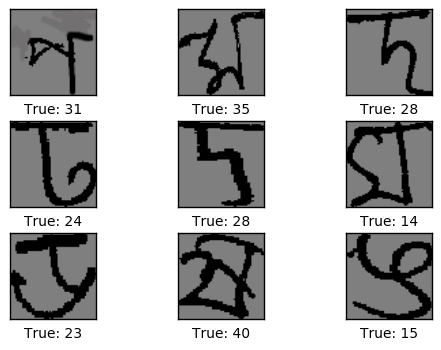

In [13]:
plot_images(data_batch[:9], np.argmax(label_batch[:9], axis=1))

# Deep neural network

In [19]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(64, 64, 3)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_10 (Dense)             (None, 50)                51250     
Total params: 12,635,186
Trainable params: 12,635,186
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 6s - loss: 3.0744 - categorical_accuracy: 0.2232 - val_loss: 2.5420 - val_categorical_accuracy: 0.3259
Epoch 2/30
375/375 [==============================] - 5s - loss: 2.0645 - categorical_accuracy: 0.4482 - val_loss: 1.9759 - val_categorical_accuracy: 0.4898
Epoch 3/30
375/375 [==============================] - 5s - loss: 1.7460 - categorical_accuracy: 0.5297 - val_loss: 1.9024 - val_categorical_accuracy: 0.4908
Epoch 4/30
375/375 [==============================] - 5s - loss: 1.5648 - categorical_accuracy: 0.5757 - val_loss: 1.8918 - val_categorical_accuracy: 0.5059
Epoch 5/30
375/375 [==============================] - 5s - loss: 1.4262 - categorical_accuracy: 0.6111 - val_loss: 1.7281 - val_categorical_accuracy: 0.5472
Epoch 6/30
375/375 [==============================] - 5s - loss: 1.3202 - categorical_accuracy: 0.6362 - val_loss: 1.8195 - val_categorical_accuracy: 0.5168
Epoch 7/30
375/375 [==============================] - 5s -

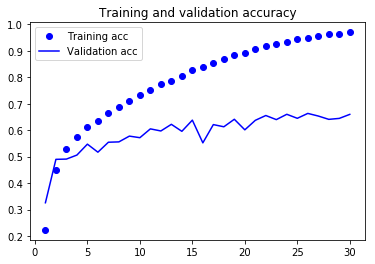

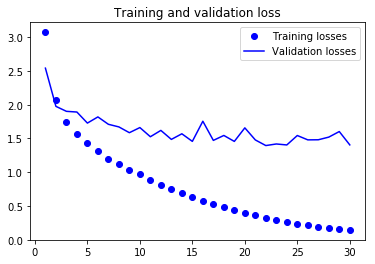

In [21]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Convolutional neural network

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4608)              0         
__________

In [23]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [24]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 5s - loss: 2.7814 - categorical_accuracy: 0.2992 - val_loss: 1.8998 - val_categorical_accuracy: 0.5016
Epoch 2/30
375/375 [==============================] - 4s - loss: 1.3880 - categorical_accuracy: 0.6298 - val_loss: 1.1325 - val_categorical_accuracy: 0.6883
Epoch 3/30
375/375 [==============================] - 4s - loss: 0.8116 - categorical_accuracy: 0.7746 - val_loss: 0.7786 - val_categorical_accuracy: 0.7823
Epoch 4/30
375/375 [==============================] - 4s - loss: 0.5396 - categorical_accuracy: 0.8481 - val_loss: 0.6740 - val_categorical_accuracy: 0.8127
Epoch 5/30
375/375 [==============================] - 4s - loss: 0.3712 - categorical_accuracy: 0.8952 - val_loss: 0.5968 - val_categorical_accuracy: 0.8282
Epoch 6/30
375/375 [==============================] - 4s - loss: 0.2525 - categorical_accuracy: 0.9290 - val_loss: 0.5363 - val_categorical_accuracy: 0.8555
Epoch 7/30
375/375 [==============================] - 5s -

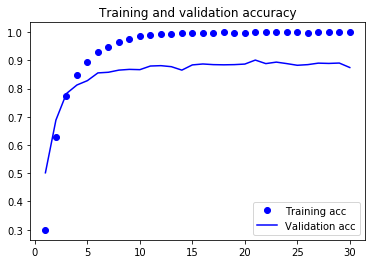

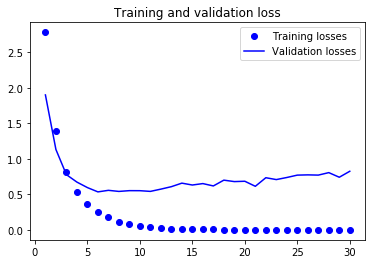

In [25]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM

In [14]:
model = models.Sequential()

model.add(layers.Reshape((64, 64*3), input_shape=(64, 64, 3)))
model.add(layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(50, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 64, 192)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1386000   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25050     
Total params: 1,411,050
Trainable params: 1,411,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [16]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/30
375/375 [==============================] - 47s 126ms/step - loss: 3.5947 - categorical_accuracy: 0.0929 - val_loss: 3.0774 - val_categorical_accuracy: 0.1962
Epoch 2/30
375/375 [==============================] - 32s 84ms/step - loss: 2.9570 - categorical_accuracy: 0.2206 - val_loss: 2.5966 - val_categorical_accuracy: 0.3146
Epoch 3/30
375/375 [==============================] - 31s 83ms/step - loss: 2.6168 - categorical_accuracy: 0.2931 - val_loss: 2.1989 - val_categorical_accuracy: 0.4007
Epoch 4/30
375/375 [==============================] - 31s 82ms/step - loss: 2.3467 - categorical_accuracy: 0.3600 - val_loss: 1.9651 - val_categorical_accuracy: 0.4581
Epoch 5/30
375/375 [==============================] - 31s 82ms/step - loss: 2.1320 - categorical_accuracy: 0.4101 - val_loss: 1.7660 - val_categorical_accuracy: 0.5119
Epoch 6/30
375/375 [==============================] - 34s 90ms/step - loss: 1.9246 - categorical_accuracy: 0.4662 - val_loss: 1.6126 - val_categorical_accuracy

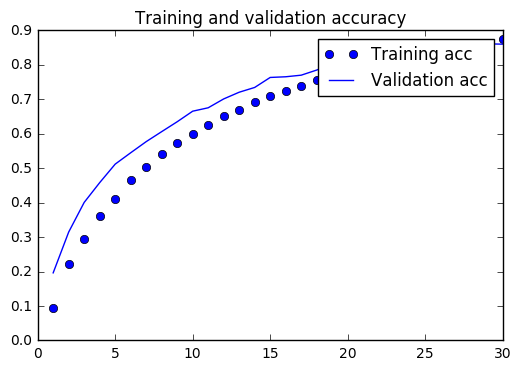

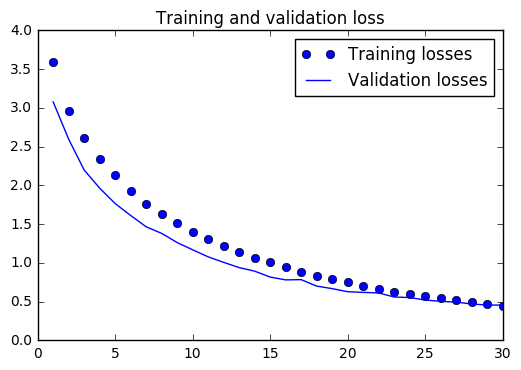

In [17]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Try using pretrained model (VGG16 on imagenet)
using imagenet dataset is not an ideal case. But give it a shot and see how the low level feature deection help

In [35]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(64, 64, 3))

In [36]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(64, 64), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(64, 64), 
    batch_size=32
)

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [38]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_17 (Dense)             (None, 50)                25650     
Total params: 15,789,426
Trainable params: 15,789,426
Non-trainable params: 0
_________________________________________________________________


In [39]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [40]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [41]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=10, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/10
375/375 [==============================] - 38s - loss: 1.4313 - categorical_accuracy: 0.6148 - val_loss: 0.3368 - val_categorical_accuracy: 0.8984
Epoch 2/10
375/375 [==============================] - 36s - loss: 0.2577 - categorical_accuracy: 0.9228 - val_loss: 0.3014 - val_categorical_accuracy: 0.9109
Epoch 3/10
375/375 [==============================] - 36s - loss: 0.1650 - categorical_accuracy: 0.9558 - val_loss: 0.1709 - val_categorical_accuracy: 0.9439
Epoch 4/10
375/375 [==============================] - 36s - loss: 0.1120 - categorical_accuracy: 0.9697 - val_loss: 0.1407 - val_categorical_accuracy: 0.9657
Epoch 5/10
375/375 [==============================] - 36s - loss: 0.0945 - categorical_accuracy: 0.9727 - val_loss: 0.1539 - val_categorical_accuracy: 0.9575
Epoch 6/10
375/375 [==============================] - 36s - loss: 0.0734 - categorical_accuracy: 0.9798 - val_loss: 0.0685 - val_categorical_accuracy: 0.9835
Epoch 7/10
375/375 [==============================] 

# Fine-tuning
As the pretrained model improves the accuracy. let's try fine tuning it for the last blocks

In [42]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [43]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=375, 
                              epochs=10, 
                              validation_data=test_generator, 
                              validation_steps=95)

Epoch 1/10
375/375 [==============================] - 18s - loss: 0.0124 - categorical_accuracy: 0.9965 - val_loss: 0.1210 - val_categorical_accuracy: 0.9799
Epoch 2/10
375/375 [==============================] - 18s - loss: 0.0072 - categorical_accuracy: 0.9982 - val_loss: 0.1388 - val_categorical_accuracy: 0.9766
Epoch 3/10
375/375 [==============================] - 18s - loss: 0.0068 - categorical_accuracy: 0.9987 - val_loss: 0.1677 - val_categorical_accuracy: 0.9733
Epoch 4/10
375/375 [==============================] - 18s - loss: 0.0023 - categorical_accuracy: 0.9992 - val_loss: 0.1629 - val_categorical_accuracy: 0.9802
Epoch 5/10
375/375 [==============================] - 18s - loss: 0.0067 - categorical_accuracy: 0.9987 - val_loss: 0.1489 - val_categorical_accuracy: 0.9825
Epoch 6/10
375/375 [==============================] - 18s - loss: 0.0019 - categorical_accuracy: 0.9995 - val_loss: 0.1599 - val_categorical_accuracy: 0.9809
Epoch 7/10
375/375 [==============================] 

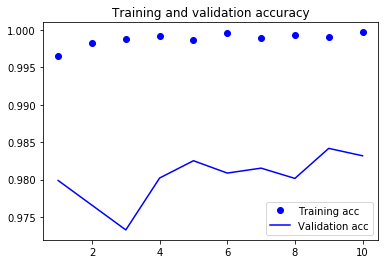

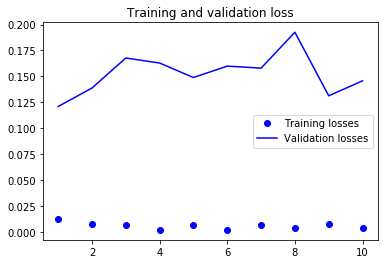

In [44]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conclusion

With the pretrained vgg26 model validation accuracy upto 98% is achieved